In [1]:

# Importing Libraries

from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances

from IPython.display import Image

In [6]:

print('K Means ALGORITHIM STEPS :')
Image('0232A118-EF98-410D-B996-6A0769F9712F.png',height = 300)

K Means ALGORITHIM STEPS :


FileNotFoundError: No such file or directory: '0232A118-EF98-410D-B996-6A0769F9712F.png'

FileNotFoundError: No such file or directory: '0232A118-EF98-410D-B996-6A0769F9712F.png'

<IPython.core.display.Image object>

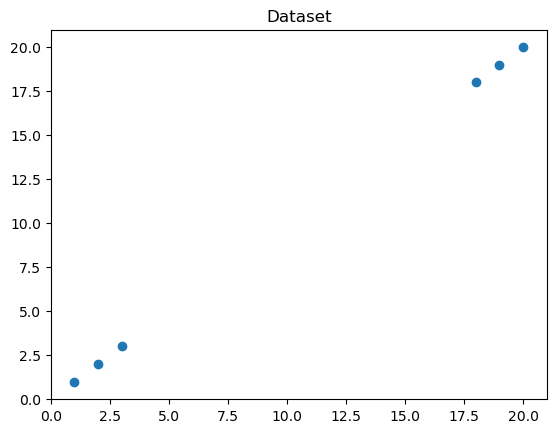

In [3]:
# Lets take an small example

x_axis = np.array([1,2,3,18,19,20])
y_axis = np.array([1,2,3,18,19,20])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,21])
plt.ylim([0,21])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

In [7]:
print('For ONE Cluster, all data points should be assigned to 1 Cluster\n')

kmeans = KMeans(n_clusters = 1, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For ONE Cluster, all data points should be assigned to 1 Cluster

Clusters assigned to each datapoints :
0    0
1    0
2    0
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 875.0


In [9]:
print('For TWO Cluster, all data points should be assigned to 2 Clusters\n')

kmeans = KMeans(n_clusters = 2, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For TWO Cluster, all data points should be assigned to 2 Clusters

Clusters assigned to each datapoints :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 8.0


For cluster = 1, SSE/WCSS is 875.0
For cluster = 2, SSE/WCSS is 8.0
For cluster = 3, SSE/WCSS is 5.0
For cluster = 4, SSE/WCSS is 2.0
For cluster = 5, SSE/WCSS is 1.0


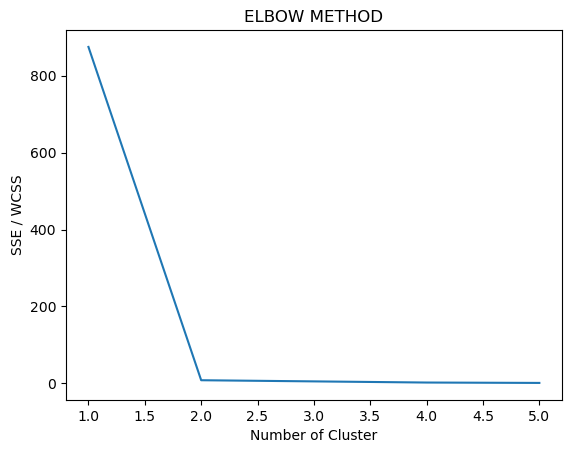

Optimum Number of Cluster : 2


In [11]:

# ELBOW METHOD

# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters
data = pd.DataFrame({'x':x_axis, 'y':y_axis})

sse = {}

for k in range(1,6): # Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  data['clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()

print('Optimum Number of Cluster : 2')

In [17]:


iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
# Preparing Data
# Here we have the target variable ‘Type’. 
# We need to remove the target variable, used to work in an unsupervised learning 
# The iloc function is used to get the features we require. 
# We also use .values function to get an array of the dataset. 
# Note : We transformed the dataset to an array so that we can plot the graphs of the clusters

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [21]:

# Now we will separate the target variable from the original dataset 
# And again convert it to an array by using numpy
iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)
print(iris_Y)
# Frequency count of the Output clusters
unique, counts = np.unique(iris_Y, return_counts=True)
freq_1 = dict(zip(unique, counts))
freq_1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


{0: 50, 1: 50, 2: 50}

In [23]:

# Filtering Setosa

Setosa = iris_data['Type'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

Filtering Setosa, True means its Setosa and False means Non Setosa
0    True
1    True
2    True
3    True
4    True
Name: Type, dtype: bool
Top 6 Rows of Setosa
   sepal length (cm)  sepal width (cm)
0                5.1               3.5
1                4.9               3.0
2                4.7               3.2
3                4.6               3.1
4                5.0               3.6
Last 6 Rows of Setosa
    sepal length (cm)  sepal width (cm)
45                4.8               3.0
46                5.1               3.8
47                4.6               3.2
48                5.3               3.7
49                5.0               3.3


Setosa for 2D Plot
X Axis points
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
Y Axis Points
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]




(2.0, 4.5)

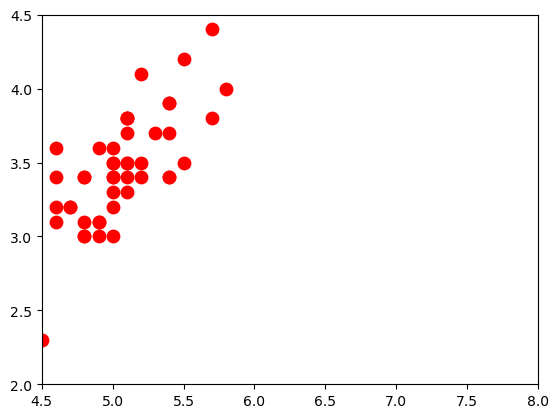

In [31]:
# Filtering Setosa for 2D Plot 

print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
# For Setosa in Target Column i.e, iris_Y = 0 
# In other word it should range from (0,0) to (0,1)
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'red', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

In [33]:
# Filtering Versicolour

Versi = iris_data['Type'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())

Filtering Versicolour, True means its Versicolour and False means Non Versicolour
0    False
1    False
2    False
3    False
4    False
Name: Type, dtype: bool
Top 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
50                7.0               3.2
51                6.4               3.2
52                6.9               3.1
53                5.5               2.3
54                6.5               2.8
Last 6 Rows of Versicolour
    sepal length (cm)  sepal width (cm)
95                5.7               3.0
96                5.7               2.9
97                6.2               2.9
98                5.1               2.5
99                5.7               2.8


Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




(2.0, 4.5)

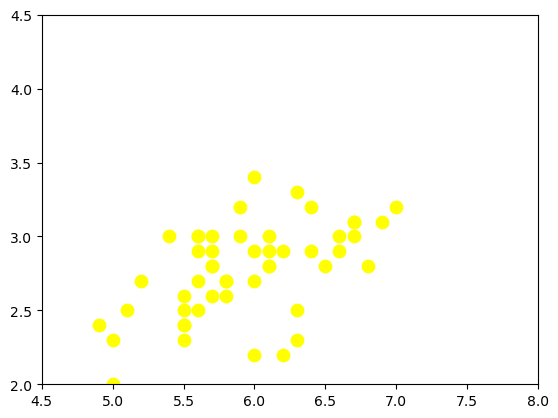

In [35]:

# Filtering Versicolour for 2D Plot 

print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])
     

In [39]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
x=df.iloc[ :,1.5]
k_val =[]
WCCS_val=[]
for ki in range(1,100:
    kmean = KMeans(n_cluster=k,max_iter=100)
    kmeans.fit(x)
    print('k_val_ ',k,'\nSum square Error',kmeans.intertia_)
    k_val.append(k)
    WCCS_val.append(kmeans.intertia_)